# Personal Notebook

C:\Users\rdgbr\Documents\University_Stuff\Fall 2023\Capstone 2\algae_dataset-20230830T143834Z-001\algae_dataset

In [45]:
import os
from pathlib import Path
import shutil
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import cv2 as cv


# Manage Data

## Reorganize The Data On Secondary Storage (only needs to be done once)

In [62]:
data_answers = []

parent = 'G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\algae_dataset'
path = Path(parent)
home = str(path.parent.absolute())
data_dir = home+'\\data'
os.mkdir(home+'\\data')
os.chdir(parent)

file_id = 0
catagories = os.listdir()
for i, c in enumerate(catagories):
    os.chdir(parent + '//' + c)
    files = os.listdir()
    for f in files:
        file_id += 1
        original = os.getcwd() + '//' + f
        target = data_dir + '//' + f'{file_id}' + '.jpg'
        shutil.copyfile(original, target)
        data_answers.append([file_id,i])
os.chdir(home)

In [63]:
map_file = 'mapping.csv'

os.chdir(home)
with open(map_file,'w',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['file_id','category'])
    writer.writerows(data_answers)

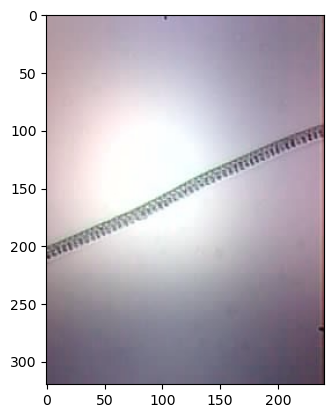

In [72]:
img1 = cv.imread('data//1550.jpg')
img2 = cv.imread('data//2.jpg')
plt.imshow(img1)

## Prepare Training and Testing set

In [29]:
map_file = 'mapping.csv'
df = pd.read_csv(map_file)

In [87]:
class AlgeaDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform = None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self,index):
        #img_path = os.path.join(self.root_dir,self.annotations.iloc[index,0] + '.jpg')
        img_path = self.root_dir + f'//{self.annotations.iloc[index,0]}.jpg'
        image = cv.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index,1]))

        if self.transform:
            image = self.transform(image)
        
        return (image,y_label)

root_dir = 'G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\data'
dataset = AlgeaDataset(map_file,root_dir, transform = torch.tensor)

tuple

# Model